# Modelo predictivo para la empresa ZYFRA
---
La empresa ZYFRA desarrolla soluciones de eficiencia en la industria pesada, por lo que quiere obtener un modelo para predecir la cantidad de oro extraído del mineral de oro.  
Nuestro trabajo consiste en preparar y limpiar todos los datos proporcionados por la empresa, para poder crear un modelo eficiente.

## Preparación de datos

### Cargamos y examinamos los datos de cada dataset

In [1]:
# Importar librerías y Cargar datos
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor

df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test_incomplete = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [2]:
df_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [3]:
# Examinar datos (solo examinaremos el dataset 'df_full' ya que de ahí se derivan los demás)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [4]:
# Estudiar datos
df_full.sample(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
12217,2017-06-07 00:59:59,3.666359,10.087545,7.722422,47.856328,58.484501,8.539712,3.354470,10.071071,3.353750,...,14.999613,-500.278802,9.891494,-379.935718,14.989579,-500.186094,9.950080,-499.900471,15.007940,-499.905400
14818,2017-09-23 09:59:59,4.048040,11.804214,6.537803,46.068151,71.031040,7.093158,3.307649,10.240081,2.510586,...,12.025148,-498.244522,9.008008,-398.589076,9.044489,-499.367146,7.037341,-499.852706,9.978060,-499.967818
16979,2017-12-22 10:59:59,5.905324,10.157076,9.681495,44.107562,79.196690,13.969083,3.378031,11.420817,3.075506,...,20.005738,-498.380100,14.873167,-499.835277,10.888749,-499.546279,9.010236,-500.331400,12.010564,-500.445860


### Comprobación de datos correctos

In [5]:
# Comprobamos que los datos de 'rougher.output.recovery' sean correctos en el conjunto de entrenamiento

df_train['rougher.output.recovery_testing'] = ((df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])) /
                                               (df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))) * 100


EAM_rougher_output_recovery_au = np.mean(np.abs(
    df_train['rougher.output.recovery'] - df_train['rougher.output.recovery_testing']))

# Eliminamos la columna nueva
df_train = df_train.drop(['rougher.output.recovery_testing'], axis=1)

print(EAM_rougher_output_recovery_au)
print()

9.303415616264301e-15



#### Conclusión  
El resultado EAM es de 9.30e-15, lo que tomaremos practicamente com "**0.0**", lo cual nos indica que podemos tomar como **correctos** los datos de la columna "rougher.output.recovery".  




### Analizamos columnas faltantes del dataset de prueba

In [6]:
# Averiguamos cuales son las columnas faltantes en el dataset de prueba
df_test_miss_columns = df_train.columns.difference(df_test_incomplete.columns)
df_train[df_test_miss_columns].info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_au                         16789 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_au                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


#### Conclusión  
Los datos que faltan son todos los datos de salida (output), podemos probar nuestro modelo más adelante sin ellos ya que el modelo tiene como objetivo predecir algunos de los datos de las columnas faltantes como 'rougher.output' y 'final.output', pero aún así completaremos el dataset de prueba con el dataset fuente para verificar más adelante la calidad del modelo creado.

### Iniciamos el preprocesamiento de datos

In [7]:
# Completamos el dataset de prueba
fechas_test = df_test_incomplete['date'].unique()
df_test = df_full[df_full['date'].isin(fechas_test)]

#### Analizamos el orden de las columnas e investigamos el significado de cada dato en ellas

In [8]:
# Reordenaremos las columnas según su proceso para poder trabajar mejor el dataset
# El orden utilizado será el siguiente:
# input > state > output > calculation. >>>>>>  feed_rate > feed_size > feed_metal > floatbank > concentrate > tail > recovery.

reorder = ['date', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_ag', 'rougher.input.feed_pb',
           'rougher.input.feed_sol', 'rougher.input.feed_au',
           'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate',
           'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate',
           'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
           'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
           'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
           'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
           'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
           'rougher.output.concentrate_au', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol',
           'rougher.output.tail_au', 'rougher.output.recovery',
           'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed',
           'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio',

           'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
           'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air',
           'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level',
           'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level',
           'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol',
           'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
           'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',

           'secondary_cleaner.state.floatbank2_a_air', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_b_air',
           'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank3_a_level',
           'secondary_cleaner.state.floatbank3_b_air', 'secondary_cleaner.state.floatbank3_b_level', 'secondary_cleaner.state.floatbank4_a_air',
           'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.state.floatbank4_b_level',
           'secondary_cleaner.state.floatbank5_a_air', 'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank5_b_air',
           'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank6_a_level',
           'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au',

           'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au',
           'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'final.output.recovery']

df_train = df_train[reorder]
df_test = df_test[reorder]
df_full = df_full[reorder]

**Datos de salida por columna**
- feed_rate = _toneladas / hora_
- feed_size = _micrones_
- input.feedsize = _gramos / tonelada_
- concentrate = _gramos / tonelada_
- recovery = _porcentaje de recuperación_

#### Eliminamos las filas innecesarias

In [9]:
# Guardamos el tamaño de nuestro dataset
len_df_full_unclean = len(df_full)
print(
    f'El tamaño de nuestro dataset CRUDO "full" es de: {len_df_full_unclean}')
len_df_train_unclean = len(df_train)
print(
    f'El tamaño de nuestro dataset CRUDO "train" es de: {len_df_train_unclean}')
len_df_test_unclean = len(df_test)
print(
    f'El tamaño de nuestro dataset CRUDO "test" es de: {len_df_test_unclean}')
print()

El tamaño de nuestro dataset CRUDO "full" es de: 22716
El tamaño de nuestro dataset CRUDO "train" es de: 16860
El tamaño de nuestro dataset CRUDO "test" es de: 5856



In [10]:
# Analizamos que no existan filas duplicadas
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())
print(df_full.duplicated().sum())
print()

0
0
0



In [11]:
# Eliminaremos las filas con valores ausentes en las columnas más importantes para entrenar nuestro modelo
def erase_nan_data(df):
    """
    Elimina filas con valores ausentes en columnas importantes para el entrenamiento del modelo.
    """
    original_rows = len(df)

    files_to_erase = ['rougher.input.feed_rate', 'rougher.input.feed_size',
                      'rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb',
                      'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au',
                      'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag',
                      'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb'
                      ]
    clean_df = df.dropna(subset=files_to_erase)

    print(f"Filas eliminadas: {original_rows - len(clean_df)}")

    return clean_df


df_full = erase_nan_data(df_full)
df_train = erase_nan_data(df_train)
df_test = erase_nan_data(df_test)
print()

Filas eliminadas: 1375
Filas eliminadas: 1255
Filas eliminadas: 120



In [12]:
# Creamos y aplicamos función, necesitamos eleminar las filas donde 'input' en oro sea igual a '0' (al hacerlo se eliminan los '0' de ag y pb)
def erase_0(df):
    """
    Elimina filas con valor '0' en la columna 'rougher.input.feed_au'.
    """
    original_rows = len(df)

    df_clean = df[df['rougher.input.feed_au'] != 0]

    print(f"Filas eliminadas: {original_rows - len(df_clean)}")

    return df_clean


df_full = erase_0(df_full)
df_train = erase_0(df_train)
df_test = erase_0(df_test)
print()

Filas eliminadas: 1076
Filas eliminadas: 742
Filas eliminadas: 334



In [13]:
# Creamos y aplicamos función para eliminar incongruencias físicas de los materiales
def erase_materials_incongruity(df):
    """
    Elimina filas con concentraciones de los materiales físicamente imposibles.
    Mantiene filas donde todas las concentraciones son 0 (paradas de planta).
    """
    original_rows = len(df)

    condition_gold = (
        ((df['rougher.output.concentrate_au'] == 0) |
         (df['primary_cleaner.output.concentrate_au'] == 0) |
            (df['final.output.concentrate_au'] == 0)) &

        ~((df['rougher.output.concentrate_au'] == 0) &
          (df['primary_cleaner.output.concentrate_au'] == 0) &
            (df['final.output.concentrate_au'] == 0))
    )
    condition_silver = (
        ((df['rougher.output.concentrate_ag'] == 0) |
         (df['primary_cleaner.output.concentrate_ag'] == 0) |
            (df['final.output.concentrate_ag'] == 0)) &

        ~((df['rougher.output.concentrate_ag'] == 0) &
          (df['primary_cleaner.output.concentrate_ag'] == 0) &
            (df['final.output.concentrate_ag'] == 0))
    )
    condition_plumb = (
        ((df['rougher.output.concentrate_pb'] == 0) |
         (df['primary_cleaner.output.concentrate_pb'] == 0) |
            (df['final.output.concentrate_pb'] == 0)) &

        ~((df['rougher.output.concentrate_pb'] == 0) &
          (df['primary_cleaner.output.concentrate_pb'] == 0) &
            (df['final.output.concentrate_pb'] == 0))
    )
    condition_solids = (
        ((df['rougher.output.concentrate_sol'] == 0) |
         (df['primary_cleaner.output.concentrate_sol'] == 0) |
            (df['final.output.concentrate_sol'] == 0)) &

        ~((df['rougher.output.concentrate_sol'] == 0) &
          (df['primary_cleaner.output.concentrate_sol'] == 0) &
            (df['final.output.concentrate_sol'] == 0))
    )

    filter_df = df[~(condition_gold | condition_silver |
                     condition_plumb | condition_solids)]

    print(f"Filas eliminadas: {original_rows - len(filter_df)}")

    return filter_df


df_full = erase_materials_incongruity(df_full)
df_train = erase_materials_incongruity(df_train)
df_test = erase_materials_incongruity(df_test)
print()

Filas eliminadas: 675
Filas eliminadas: 487
Filas eliminadas: 188



In [14]:
# Analizamos los tamaños resultantes de los datasets limpios
len_df_full_clean = len(df_full)
eliminated_percent_full = round(
    (1 - (len_df_full_clean / len_df_full_unclean)) * 100, 2)
print(f'El tamaño de nuestro dataset LIMPIO es de: {len_df_full_clean}')
print(
    f'En total se eliminaron {len_df_full_unclean - len_df_full_clean} filas que representa el {eliminated_percent_full}%.')

len_df_train_clean = len(df_train)
eliminated_percent_train = round(
    (1 - (len_df_train_clean / len_df_train_unclean)) * 100, 2)
print(f'El tamaño de nuestro dataset LIMPIO es de: {len_df_train_clean}')
print(
    f'En total se eliminaron {len_df_train_unclean - len_df_train_clean} filas que representa el {eliminated_percent_train}%.')

len_df_test_clean = len(df_test)
eliminated_percent_test = round(
    (1 - (len_df_test_clean / len_df_test_unclean)) * 100, 2)
print(f'El tamaño de nuestro dataset LIMPIO es de: {len_df_test_clean}')
print(
    f'En total se eliminaron {len_df_test_unclean - len_df_test_clean} filas que representa el {eliminated_percent_test}%.')
print()

El tamaño de nuestro dataset LIMPIO es de: 19590
En total se eliminaron 3126 filas que representa el 13.76%.
El tamaño de nuestro dataset LIMPIO es de: 14376
En total se eliminaron 2484 filas que representa el 14.73%.
El tamaño de nuestro dataset LIMPIO es de: 5214
En total se eliminaron 642 filas que representa el 10.96%.



In [15]:
# Analizamos que valores ausentes que no se pueden eliminar de cada columna para decidir como tratar cada uno
null_values = df_full.isnull().sum()
columns_with_null = null_values[null_values > 0]
print(columns_with_null)
print()

rougher.input.feed_sol                       125
rougher.input.floatbank10_sulfate            181
rougher.input.floatbank10_xanthate            61
rougher.input.floatbank11_sulfate            167
rougher.input.floatbank11_xanthate           557
rougher.state.floatbank10_a_air               10
rougher.state.floatbank10_a_level             10
rougher.state.floatbank10_b_air               10
rougher.state.floatbank10_b_level             10
rougher.state.floatbank10_c_air               10
rougher.state.floatbank10_c_level             10
rougher.state.floatbank10_d_air               10
rougher.state.floatbank10_d_level             10
rougher.state.floatbank10_e_air              431
rougher.state.floatbank10_e_level             10
rougher.state.floatbank10_f_air               10
rougher.state.floatbank10_f_level             10
rougher.output.concentrate_sol                44
rougher.output.tail_ag                       768
rougher.output.tail_sol                      767
rougher.output.tail_

In [16]:
def replace_0_null(df):
    """
    Reemplaza los valores ausentes por 0 en columnas descritas.
    """

    columns = ['rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate',
               'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate',
               'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
               'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
               'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
               'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
               'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.xanthate',
               'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air',
               'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level',
               'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'secondary_cleaner.state.floatbank2_a_air',
               'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_b_air',
               'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank3_a_level',
               'secondary_cleaner.state.floatbank3_b_air', 'secondary_cleaner.state.floatbank3_b_level', 'secondary_cleaner.state.floatbank4_a_air',
               'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.state.floatbank4_b_level',
               'secondary_cleaner.state.floatbank5_a_air', 'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank5_b_air',
               'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank6_a_level']

    df[columns] = df[columns].replace(np.nan, 0)

    return df


df_full = replace_0_null(df_full)
df_train = replace_0_null(df_train)
df_test = replace_0_null(df_test)

In [17]:
def interpolate_null(df):
    """
    Reemplaza los valores ausentes por la interpolación lineal.
    """

    columns = ['rougher.input.feed_sol', 'rougher.output.tail_ag', 'rougher.output.tail_sol', 'rougher.output.tail_au',
               'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
               'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol',
               'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol'
               ]

    df[columns] = df[columns].interpolate(method='linear')

    return df


df_full = interpolate_null(df_full)
df_train = interpolate_null(df_train)
df_test = interpolate_null(df_test)

In [18]:
# Función para reemplazar NaN por mediana
def median_null(df_full, df_train, df_test):
    """
    Reemplaza los valores ausentes de las columnas descritas por la mediana del dataset 'df_full'.
    """

    columns = ['rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol',
               'final.output.concentrate_sol'
               ]

    for col in columns:
        median = df_full[col].median()
        df_full[col] = df_full[col].fillna(median)
        df_train[col] = df_train[col].fillna(median)
        df_test[col] = df_test[col].fillna(median)

    return df_full, df_train, df_test


# Aplicamos la función
df_full, df_train, df_test = median_null(df_full, df_train, df_test)

In [19]:
# Creamos función que calcule el rougher recovery para los valores ausentes
def calculate_recovery_null_values(df):
    """
    Calcula rougher.output.recovery para valores ausentes usando la fórmula de rougher_recovery y elimina los resultados iguales o menor a 0.
    """

    # Identificar filas con recovery faltante pero con datos necesarios disponibles
    null_rougher_recovery = df['rougher.output.recovery'].isna()
    necessary_data = (
        df['rougher.output.concentrate_au'].notna() &
        df['rougher.input.feed_au'].notna() &
        df['rougher.output.tail_au'].notna() &
        (df['rougher.output.concentrate_au'] !=
         df['rougher.output.tail_au'])  # Evitar división entre 0
    )

    calculation = null_rougher_recovery & necessary_data

    # Calcular recovery para las filas que cumplen las condiciones
    df.loc[calculation, 'rougher.output.recovery'] = (
        (df.loc[calculation, 'rougher.output.concentrate_au'] * (df.loc[calculation, 'rougher.input.feed_au'] - df.loc[calculation, 'rougher.output.tail_au'])) /
        (df.loc[calculation, 'rougher.input.feed_au'] * (df.loc[calculation,
         'rougher.output.concentrate_au'] - df.loc[calculation, 'rougher.output.tail_au']))
    ) * 100

    original_rows = len(df)

    filter_df = df[(df['rougher.output.recovery'] >= 0) & (
        df['rougher.output.recovery'] <= 100)].copy()
    print(f"Filas eliminadas: {original_rows - len(filter_df)}")

    return filter_df


df_full = calculate_recovery_null_values(df_full)
df_train = calculate_recovery_null_values(df_train)
df_test = calculate_recovery_null_values(df_test)

Filas eliminadas: 287
Filas eliminadas: 260
Filas eliminadas: 27


In [20]:
# Verificamos que no tengamos más valores ausentes
null_values = df_full                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 .isnull().sum()
columns_with_null = null_values[null_values > 0]
print(columns_with_null)
print()

final.output.recovery    101
dtype: int64



In [21]:
# Eliminaremos las filas con valores ausentes que fue imposible tratar de otra manera
def erase_nan_intractable_data(df):
    """
    Elimina filas con valores ausentes en la columna 'final.output.recovery'.
    """
    original_rows = len(df)

    clean_df = df.dropna(subset=['final.output.recovery'])

    print(f"Filas eliminadas: {original_rows - len(clean_df)}")

    return clean_df


df_full = erase_nan_intractable_data(df_full)
df_train = erase_nan_intractable_data(df_train)
df_test = erase_nan_intractable_data(df_test)
print()

Filas eliminadas: 101
Filas eliminadas: 85
Filas eliminadas: 16



In [22]:
# Realizamos la verificaión final
null_values = df_full                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 .isnull().sum()
columns_with_null = null_values[null_values > 0]
print(f'El número de columnas con valores ausentes son: {columns_with_null}')
print()

El número de columnas con valores ausentes son: Series([], dtype: int64)



In [23]:
# Observamos los tamaños resultantes finales
len_df_full_clean = len(df_full)
eliminated_percent_full = round(
    (1 - (len_df_full_clean / len_df_full_unclean)) * 100, 2)
print(f'El tamaño de nuestro dataset LIMPIO es de: {len_df_full_clean}')
print(
    f'En total se eliminaron {len_df_full_unclean - len_df_full_clean} filas que representa el {eliminated_percent_full}%.')

len_df_train_clean = len(df_train)
eliminated_percent_train = round(
    (1 - (len_df_train_clean / len_df_train_unclean)) * 100, 2)
print(f'El tamaño de nuestro dataset LIMPIO es de: {len_df_train_clean}')
print(
    f'En total se eliminaron {len_df_train_unclean - len_df_train_clean} filas que representa el {eliminated_percent_train}%.')

len_df_test_clean = len(df_test)
eliminated_percent_test = round(
    (1 - (len_df_test_clean / len_df_test_unclean)) * 100, 2)
print(f'El tamaño de nuestro dataset LIMPIO es de: {len_df_test_clean}')
print(
    f'En total se eliminaron {len_df_test_unclean - len_df_test_clean} filas que representa el {eliminated_percent_test}%.')
print()

El tamaño de nuestro dataset LIMPIO es de: 19202
En total se eliminaron 3514 filas que representa el 15.47%.
El tamaño de nuestro dataset LIMPIO es de: 14031
En total se eliminaron 2829 filas que representa el 16.78%.
El tamaño de nuestro dataset LIMPIO es de: 5171
En total se eliminaron 685 filas que representa el 11.7%.



#### Conclusión  
- Primero completamos conjunto de datos de prueba , después ordenamos las columnas en los 3 datasets, revisasmos que no existieran duplicados en la base de datos.  
- En segundo lugar eliminamos filas que contienen valores ausentes en las columnas más importantes y también 'rougher.input.feed_au' igual a "0", ya que sin estos datos de entrada no es posible tener datos de salida, luego eliminamos incongruncias físicamente imposibles en las concentraciones de los materiales.  
- En tercer lugar utilizamos métodos como reemplazar por 0, interpolación, reemplazar por mediana y finalmente calcular los valores restantes de recovery con cada formula, todo esto para poder tratar los valores ausentes que 'no' recomendamos eliminar ya sea por la cantidad de datos pérdidos o por el sesgo que puede aprender el modelo.
- Por último eliminamos los pocos valores ausentes que quedaban y no pudimos tratar con otros métodos que actuarande manera lógica en los resultados que pudieramos obtener.

El tamaño del dataset quedó limpio y con un restante de datos del 84.53%, suficientemente sólido para entrenar nuestros modelos predictivos.

## Análisis de datos

### Cambio de concentración por etapas

In [24]:
# Creamos datasets nuevos con los concentrados en las 3 etapas por cada material
df_concentrate_changes_au = df_full[['date', 'rougher.output.concentrate_au',
                                     'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
df_concentrate_changes_ag = df_full[['date', 'rougher.output.concentrate_ag',
                                     'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
df_concentrate_changes_pb = df_full[['date', 'rougher.output.concentrate_pb',
                                     'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
df_concentrate_changes_sol = df_full[['date', 'rougher.output.concentrate_sol',
                                      'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol']]

In [25]:
df_concentrate_changes_au.head(2)

,date,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,2016-01-15 00:00:00,19.793808,34.174427,42.192020
1,2016-01-15 01:00:00,20.050975,34.118526,42.701629


In [26]:
df_concentrate_changes_ag.head(2)

,date,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,2016-01-15 00:00:00,11.500771,8.547551,6.055403
1,2016-01-15 01:00:00,11.615865,8.558743,6.029369


In [27]:
df_concentrate_changes_pb.head(2)

,date,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,2016-01-15 00:00:00,7.101074,10.389648,9.889648
1,2016-01-15 01:00:00,7.278807,10.497069,9.968944


In [28]:
df_concentrate_changes_sol.head(2)

,date,rougher.output.concentrate_sol,primary_cleaner.output.concentrate_sol,final.output.concentrate_sol
0,2016-01-15 00:00:00,28.029297,19.529297,5.507324
1,2016-01-15 01:00:00,28.067063,19.369147,5.257781


In [29]:
# Calculamos promedios de concentrado por etapa
print('rougher', df_concentrate_changes_au['rougher.output.concentrate_au'].mean().round(2), df_concentrate_changes_ag['rougher.output.concentrate_ag'].mean().round(
    2), df_concentrate_changes_pb['rougher.output.concentrate_pb'].mean().round(2), df_concentrate_changes_sol['rougher.output.concentrate_sol'].mean().round(2))
print('primary_cleaner', df_concentrate_changes_au['primary_cleaner.output.concentrate_au'].mean().round(2), df_concentrate_changes_ag['primary_cleaner.output.concentrate_ag'].mean(
).round(2), df_concentrate_changes_pb['primary_cleaner.output.concentrate_pb'].mean().round(2), df_concentrate_changes_sol['primary_cleaner.output.concentrate_sol'].mean().round(2))
print('final', df_concentrate_changes_au['final.output.concentrate_au'].mean().round(2), df_concentrate_changes_ag['final.output.concentrate_ag'].mean().round(
    2), df_concentrate_changes_pb['final.output.concentrate_pb'].mean().round(2), df_concentrate_changes_sol['final.output.concentrate_sol'].mean().round(2))

rougher 20.08 12.19 7.74 29.32
primary_cleaner 32.01 8.48 9.79 10.48
final 43.91 5.19 9.98 9.51


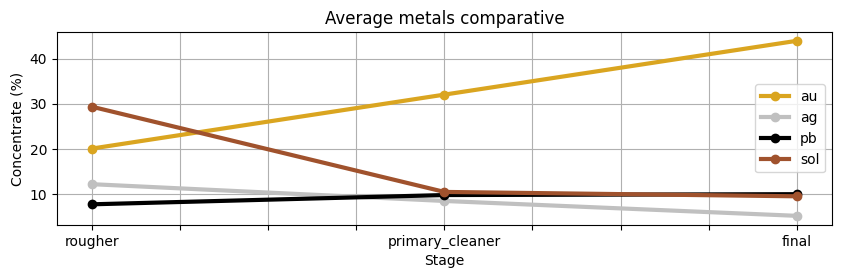

                    au     ag    pb    sol
rougher          20.08  12.19  7.74  29.32
primary_cleaner  32.01   8.48  9.79  10.48
final            43.91   5.19  9.98   9.51



In [30]:
# Creamos df con el promedio de cada elemento para observar su tendencia

data = [20.08, 12.19, 7.74, 29.32, 32.01,
        8.48, 9.79, 10.48, 43.91, 5.19, 9.98, 9.51]

data_matrix = [
    [20.08, 12.19, 7.74, 29.32],
    [32.01, 8.48, 9.79, 10.48],
    [43.91, 5.19, 9.98, 9.51]
]

df_comparative_materials_mean = pd.DataFrame(
    data=data_matrix,
    index=['rougher', 'primary_cleaner', 'final'],
    columns=['au', 'ag', 'pb', 'sol']
)

df_comparative_materials_mean.plot(y=['au', 'ag', 'pb', 'sol'], title='Average metals comparative', xlabel='Stage', ylabel='Concentrate (%)', figsize=[
    10, 2.5], color=['goldenrod', 'silver', 'black', 'sienna'], grid=True, marker='o', linewidth=3, rot=0)
plt.show()
print(df_comparative_materials_mean)
print()

#### Conclusión
En este gráfico se puede observar que los procesos están siendo exitosos por dos razones importantes:
- Aumenta la concentración de oro y lo logran con un aproximado un poco más del **120%** más de concentración desde la primera etapa (rougher) hasta la etapa final. Aunque esto no nos indica la eficiencia de los procesos parece que van por buen camino.
- Disminuye la concentración de sólidos con cada etapa (sol) casi el **70%** aproximadamente. Esto nos indica que los procesos están eliminando los materiales NO valiosos.

### Comparación de distribuciones entre conjuntos de entrenamiento y prueba (rougher.input.feed_size)

In [31]:
# Analizamos distribucion de conjunto de entrenamiento con el método '.Describe()'
df_train['rougher.input.feed_size'].describe()

count    14031.000000
mean        59.770806
std         22.296500
min          9.659576
25%         48.733148
50%         55.117533
75%         65.714311
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [32]:
# Analizamos distribucion de conjunto de prueba con el método '.Describe()'
df_test['rougher.input.feed_size'].describe()

count    5171.000000
mean       56.366883
std        21.118595
min         0.046369
25%        43.897990
50%        51.190319
75%        62.613675
max       477.445473
Name: rougher.input.feed_size, dtype: float64

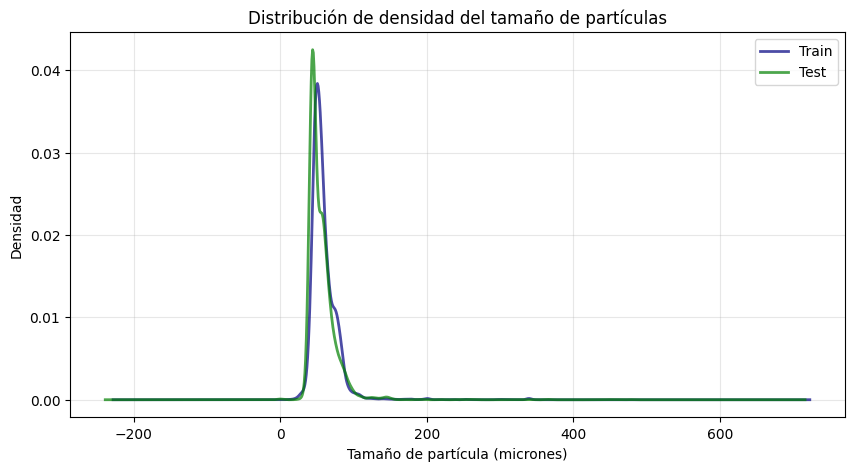

In [33]:
# Presentamos resultados gráficamente con gráfico de densidad
plt.figure(figsize=(10, 5))
df_train['rougher.input.feed_size'].plot.density(
    label='Train', alpha=0.7, linewidth=2, color='navy')
df_test['rougher.input.feed_size'].plot.density(
    label='Test', alpha=0.7, linewidth=2, color='green')
plt.xlabel('Tamaño de partícula (micrones)')
plt.ylabel('Densidad')
plt.title('Distribución de densidad del tamaño de partículas')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [34]:
# Test t de Student para comparar medias
t_stat, p_value = stats.ttest_ind(df_train['rougher.input.feed_size'],
                                  df_test['rougher.input.feed_size'])
print(f"p-value: {p_value}")

p-value: 1.986989156975266e-21


#### Conclusión  
Utilizamos 3 metodos para asegurarnos que no tenemos una diferencia significativa con la columna 'rougher.input.feed_size' en ambos conjutnos de datos (entrenamiento y prueba):  
- Con el método .describe() revisamos manualmente que no existen cambios a simple vista.
- Utilizamos un gráfico de dispersión y no se ve una diferencia significativa.
- Por último y el más confiable, usamos el método estadístico y encontramos que estadísticamente la diferencia si es significativamente diferente.
 
Como conclusión final las distribuciones de los conjuntos **si** son significativamente diferentes, por lo cual la evaluación del modelo podría no ser adecuada.

### Observación concentraciones totales de los materiales (au, ag, pb, sol)

In [35]:
df_concentrate_changes_au.describe()

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,19202.000000,19202.000000,19202.000000
mean,20.083646,32.006214,43.912588
std,3.002489,5.690443,5.508647
min,0.000000,0.000000,0.000000
25%,18.917227,30.349996,43.315339
50%,20.350642,32.723722,44.963866
75%,21.808413,34.966028,46.232128
max,28.824507,45.933934,51.571885


In [36]:
df_concentrate_changes_ag.describe()

,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,19202.000000,19202.000000,19202.000000
mean,12.191778,8.481768,5.192593
std,2.367997,2.077470,1.445778
min,0.000000,0.000000,0.000000
25%,10.712622,7.289189,4.256040
50%,12.199250,8.547954,5.078398
75%,13.799285,9.861314,5.914633
max,21.725695,16.081632,16.001945


In [37]:
df_concentrate_changes_pb.describe()

,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,19202.000000,19202.000000,19202.000000
mean,7.741948,9.791224,9.978485
std,1.565322,2.586903,1.720940
min,0.000000,0.000000,0.000000
25%,6.811500,8.636372,9.151512
50%,7.785571,10.130367,10.111763
75%,8.602739,11.409062,11.052582
max,15.389648,17.081278,17.031899


In [38]:
df_concentrate_changes_sol.describe()

,rougher.output.concentrate_sol,primary_cleaner.output.concentrate_sol,final.output.concentrate_sol
count,19202.000000,19202.000000,19202.000000
mean,29.324444,10.483132,9.510704
std,4.920346,3.899738,2.822807
min,0.000000,0.000000,0.000000
25%,27.508437,7.920866,7.728800
50%,29.992250,10.328021,9.222155
75%,32.344033,13.427385,10.975812
max,40.089993,22.458114,19.615720


#### Conclusión  
Las anomalías fueron purgadas en el preprocesamiento de datos. Por otro lado, analizando los resultados con el método '.describe()' en los concentrados de todos los materiales (au, ag, pb ,sol) no tenemos una discrepancia entre datos, no hay datos muy altos ni muy bajos.  
*Bases de datos procesadas y listas para ser entrenadas.*

## Construcción del modelo

### Calculador de sMAPE

In [39]:
# Creamos la función para calcular el sMAPE final
def sMAPE_calculation(targets_r, targets_f, predictions_r, predictions_f):

    smape_rec_rougher = (1/len(targets_r)) * sum(abs(targets_r -
                                                     predictions_r) / ((abs(targets_r) + abs(predictions_r)) / 2)) * 100
    smape_rec_final = (1/len(targets_f)) * sum(abs(targets_f -
                                                   predictions_f) / ((abs(targets_f) + abs(predictions_f)) / 2)) * 100

    smape_final = (0.25 * smape_rec_rougher) + (0.75 * smape_rec_final)

    return smape_final

### Comparación de modelos con validación cruzada

In [40]:
# Datos generales para entrenamiento de modelos
features_train = df_train.drop(
    ['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]
random = 23451

In [41]:
# Regresión Lineal
model = MultiOutputRegressor(LinearRegression())

cross_score = (
    (cross_val_score(model, features_train, target_train)).sum()) / 5

print('Puntuación media de la evaluación del modelo:', cross_score)
print()

Puntuación media de la evaluación del modelo: 0.09311087038753615



In [42]:
%%time
# Bosque aleatorio
model = MultiOutputRegressor(RandomForestRegressor(random_state=random, n_estimators=50, max_depth=10, n_jobs=-1))

cross_score = ((cross_val_score(model, features_train, target_train)).sum()) / 5

print('Puntuación media de la evaluación del modelo:', cross_score)
print()

Puntuación media de la evaluación del modelo: 0.8181480882438175

CPU times: user 3min 51s, sys: 76.8 ms, total: 3min 51s
Wall time: 1min 57s


In [43]:
# Árbol de decisión
model = MultiOutputRegressor(
    DecisionTreeRegressor(random_state=random, max_depth=10))

final_score = (
    (cross_val_score(model, features_train, target_train)).sum()) / 5

print('Puntuación media de la evaluación del modelo:', final_score)
print()

Puntuación media de la evaluación del modelo: 0.5498048813451034



### Mejor modelo

In [44]:
%%time
# Bosque aleatorio (mejor modelo)
model = MultiOutputRegressor(RandomForestRegressor(random_state=random, n_estimators=50, max_depth=10, n_jobs=-1))
model.fit(features_train, target_train)

# Probaremos el mejor modelo con el dataset de prueba
features_test = df_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = df_test[['rougher.output.recovery', 'final.output.recovery']]

#Guardamos objetivos del modelo
target_rougher = target_test['rougher.output.recovery'].values
target_final = target_test['final.output.recovery'].values

# Calculamos predicciones del modelo
predictions = model.predict(features_test)
predictions_rougher = predictions[:,0]
predictions_final = predictions[:,1]

sMAPE_final = sMAPE_calculation(target_rougher, target_final, predictions_rougher, predictions_final)

print('sMAPE final:', sMAPE_final)


sMAPE final: 1.1797529098235735
CPU times: user 59.1 s, sys: 95.3 ms, total: 59.2 s
Wall time: 29.9 s


#### Conclusión  
El modelo con mejor puntuación utilizando la validación cruzada fue del bosque aleatorio con una puntuación de 0.81 que significa que el modelo puede explicar el 81% de la variabilidad y que se capturan de manera eficiente los patrones en el proceso de recuperación del oro.  
Aplicando este modelo elegido y usando la función de sMAPE final a nuestro dataset de prueba obtenemos como resultado 1.18, que significa que el modelo se equivoca prediciendo en promedio 1.18% de las veces, lo cúal es muy bajo.  
Hemos tratado los datos correctamente y logrado crear un modelo predictivo eficiente para el proceso de recuperación de oro.